In [79]:
#https://fxdata.cloud/tutorials/a-guide-for-time-series-forecasting-with-arima-in-python-3
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
#change Server=your server name in SQL management studio
%matplotlib inline
import pyodbc 
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=DESKTOP-T3PQE3U;"
                      "Database=AdventureWorks2012;"
                      "Trusted_Connection=yes;")

#cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
 #                     "Server=DESKTOP-556NPKF;"
  #                    "Database=AdventureWorks2012;"
  #                    "Trusted_Connection=yes;")

In [80]:
#df = pd.read_sql_query(""" 
#SELECT A.[SalesOrderID]
#,A.[LineTotal]
#,B.[OrderDate]
#,C.[Name]
#FROM [Sales].[SalesOrderDetail] AS A
#LEFT JOIN [Sales].[SalesOrderHeader] AS B
#ON A.SalesOrderID = B.SalesOrderID
#LEFT JOIN [Sales].[SalesTerritory] AS C
#ON B.TerritoryID = C.TerritoryID
#WHERE C.[Name]""", cnxn)

In [81]:
#List of regions
#Northwest, Northeast, Central, Southwest, Southeast, Canada, France, Germany, Australia, United Kingdom

In [82]:
df = pd.read_sql_query(""" 
SELECT
A.[LineTotal] as Revenue
,B.[OrderDate]
FROM [Sales].[SalesOrderDetail] AS A
LEFT JOIN [Sales].[SalesOrderHeader] AS B
ON A.SalesOrderID = B.SalesOrderID
LEFT JOIN [Sales].[SalesTerritory] AS C
ON B.TerritoryID = C.TerritoryID
WHERE C.[Name] = 'Australia'
""", cnxn)

In [83]:
df.head(5)

,Revenue,OrderDate
0,3399.99,2011-05-31
1,3578.27,2011-06-01
2,3374.99,2011-06-01
3,3399.99,2011-06-01
4,3578.27,2011-06-02


In [84]:
df = df.set_index(['OrderDate'])

In [85]:
#Summarise the transactions by order month
# The 'MS' string groups the data in buckets by start of the month
y = df['Revenue'].resample('MS').sum()

In [86]:
y.head(5)

OrderDate
2011-05-01      3399.9900
2011-06-01    206252.9146
2011-07-01    222538.2892
2011-08-01    177393.5028
2011-09-01    214593.3928
Freq: MS, Name: Revenue, dtype: float64

In [87]:
# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())


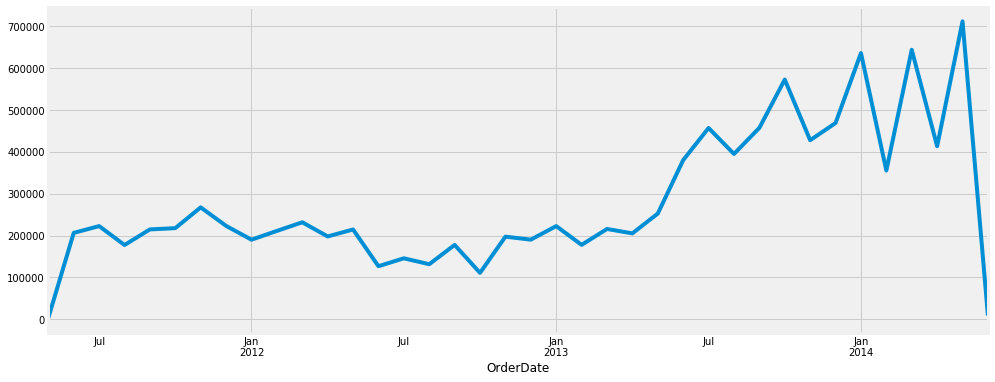

In [88]:
y.plot(figsize=(15, 6))
plt.show()

In [89]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [90]:
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1047.3576028959699
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:559719.4920708311
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:694.9650731903201
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:718.8224107214213
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1086.452382120955
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:395.3900977119124
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1004.7281645068373
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:467744.0084243745
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:663.1621365417268
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:725.178621086105
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:393.35759780160487
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:967.3155996553584
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:661.2257180337881
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:681.2522072344753
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:362.52657344463
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:931.26883967058

In [91]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None
 
for param in pdq:
    for param_seasonal in seasonal_pdq:`
        try:
            tmp_mdl = sm.tsa.statespace.SARIMAX(y,
                                                order = param,
                                                seasonal_order = param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
            res = tmp_mdl.fit()
            if res.aic < best_aic:
                best_aic = res.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_mdl = tmp_mdl
        except:
            
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 model - AIC:658.6708864233333


In [92]:
# print statistics
print(res.aic)
print(res.summary())

658.6708864233333
                                 Statespace Model Results                                 
Dep. Variable:                            Revenue   No. Observations:                   38
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -325.335
Date:                            Thu, 16 Jul 2020   AIC                            658.671
Time:                                    10:39:53   BIC                            663.546
Sample:                                05-01-2011   HQIC                           660.023
                                     - 06-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.427     -2.344      0.019      -1.836      -0.164
ma.L1         -0.

In [93]:
plt.style.use('fivethirtyeight')
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [94]:
# print statistics
#print(result.aic)
#print(result.summary())

In [95]:
from scipy.stats import chi2
chi = chi2.isf(q=0.05, df=116)
chi

142.13816003902645

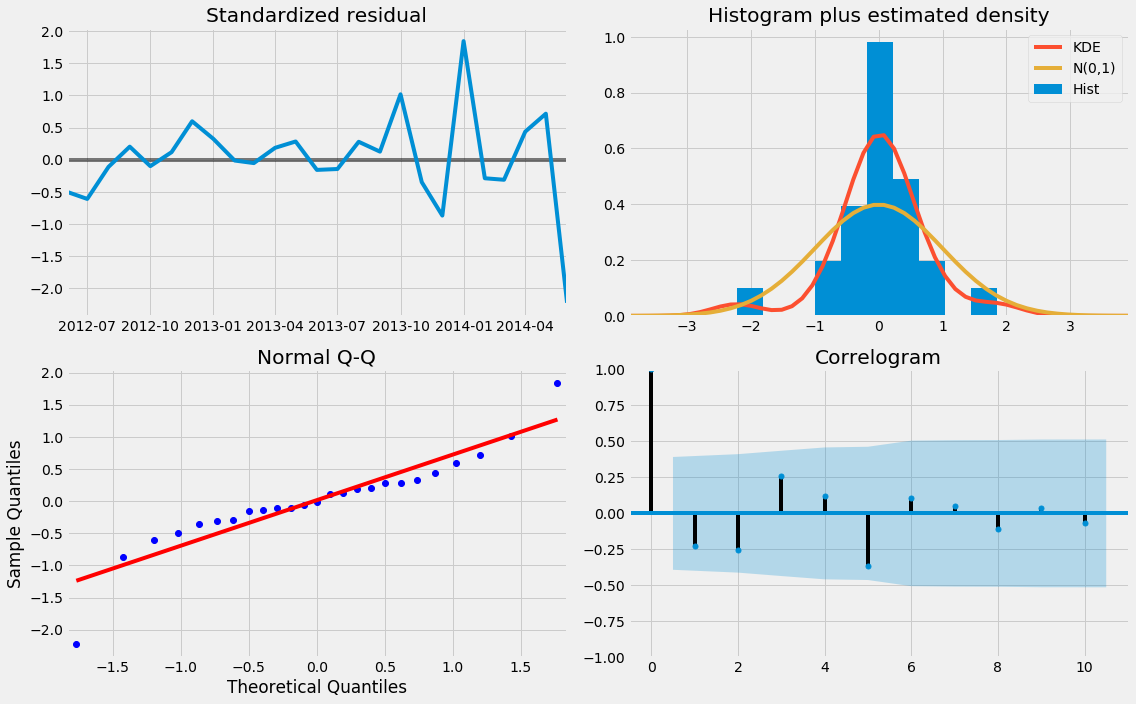

In [96]:
res.plot_diagnostics(figsize=(16, 10))
plt.tight_layout()
plt.show()

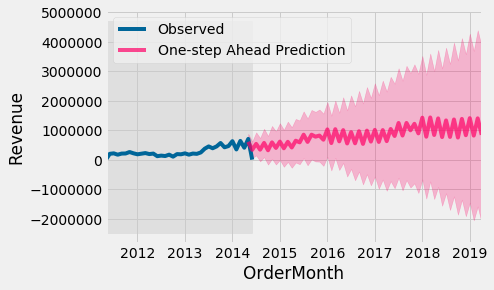

In [97]:
### in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2014-05-01'), 
                          end=pd.to_datetime('2019-04-01'),
                          dynamic=True)
pred_ci = pred.conf_int()
 
# plot in-sample-prediction
ax = y.plot(label='Observed',color='#006699');
pred.predicted_mean.plot(ax=ax, label='One-step Ahead Prediction', alpha=.7, color='#ff0066');
 
# draw confidence bound (gray)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);
 
# style the plot
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2011-04-01'), y.index[-1], alpha=.15, zorder=-1, color='grey');
ax.set_xlabel('OrderMonth')
ax.set_ylabel('Revenue')
plt.legend(loc='upper left')
plt.show()

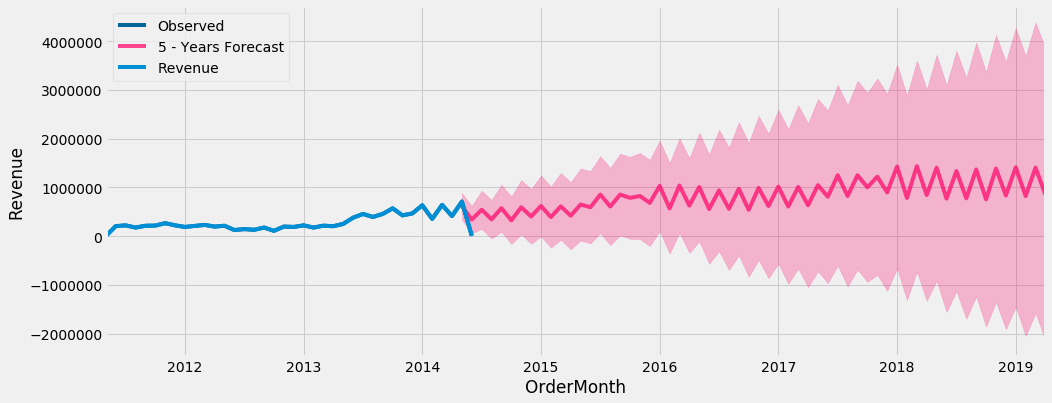

In [98]:
#pred.predicted_mean
# plot in-sample-prediction
ax = y.plot(label='Observed',color='#006699');
pred.predicted_mean.plot(figsize=(15, 6),label='5 - Years Forecast', alpha=.7, color='#ff0066')
#draw confidence bound (gray)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);
y.plot(figsize=(15, 6))
ax.set_xlabel('OrderMonth')
ax.set_ylabel('Revenue')
plt.legend(loc='upper left')
plt.show()

In [99]:
all_dfs = [y, pred.predicted_mean]

In [100]:
df = pd.DataFrame(np.array(pd.concat(all_dfs).reset_index(drop=False)), columns =  ['Month', 'Revenue'])

In [101]:
df = df.set_index(['Month'])

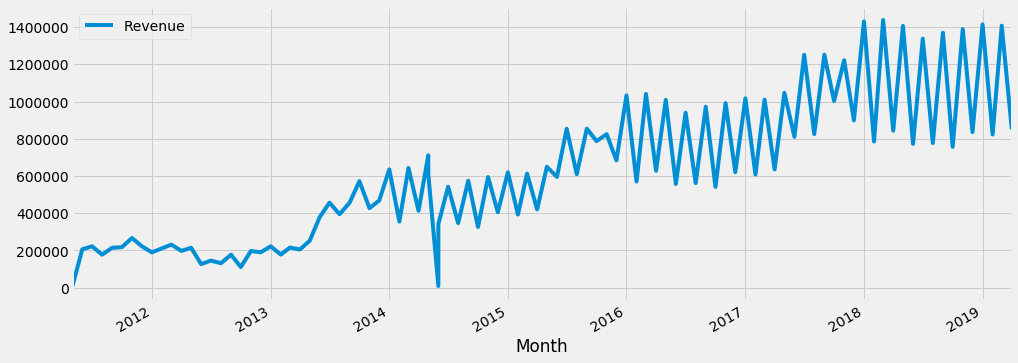

In [102]:
#df.plot(label='Revenue',color='#006699');
df.plot(figsize=(15, 6))

In [103]:
df.head(5)

,Revenue
Month,
2011-05-01,3399.99
2011-06-01,206253
2011-07-01,222538
2011-08-01,177394
2011-09-01,214593


In [104]:
df.tail(5)

,Revenue
Month,
2018-12-01,836016
2019-01-01,1.41459e+06
2019-02-01,823540
2019-03-01,1.40776e+06
2019-04-01,851018
